## 파이썬과 판다스를 활용한 실전 데이터 분석

이번 과제는 캐글의 타이타닉([Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/)) 데이터를 더 깊게 분석합니다.

데이터 사이언티스트로서 데이터를 분석할 때 가장 필수적인 스킬은 프로그래밍 언어 파이썬([Python](https://www.python.org/)), 데이터 분석 패키지 판다스([Pandas](https://pandas.pydata.org/)), 그리고 데이터 시각화 패키지 씨본([Seaborn](https://seaborn.pydata.org))과 [matplotlib](https://matplotlib.org)입니다. 데이터 분석가는 언제나 주변 동료들의 요청(ex: 운영팀, 재무팀, 마케팅팀)에 맞게 데이터를 뽑아내 그 통계치를 제공하고 시각화 결과를 전달해줘야 하는데, 파이썬과 판다스, 시각화 스킬이 부족하면 주어진 시간 내에 이를 전달해 줄 수 없습니다.

이런 문제가 생기지 않기 위해, **모든 데이터 사이언티스트는 데이터를 능숙하게 다룰 수 있는 파이썬과 판다스, 시각화 스킬을 필수적으로 보유하고 있어야 합니다.**

이번 노트북에는 타이타닉 데이터를 활용하여, 현업에서 충분히 발생할 만한 사례를 모아 총 12개의 문제를 만들어 보았습니다. 주어진 시간 내에 모든 문제를 해결해보세요. DS School의 내부 테스트 결과, 현업에서 데이터 사이언티스트로 일 하고 있는 분들은 아무리 늦어도 반나절(3~4시간) 내에는 모든 문제를 풀 수 있었습니다. 즉, 3시간 안에 모든 문제를 풀 수 있다면 합격입니다.

문제를 풀 때 다른 자료(DS School 입문반에서 제공한 자료, 또는 판다스, 시각화 전문 서적)를 참고하거나, 구글에 검색하는 것 모두 허용합니다. (문제 중에는 구글에 검색하지 않으면 풀 수 없는 문제도 몇 개 준비해놓았습니다) 관련 자료는 [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html) 를 강력 추천합니다.

또한 아래 문제를 풀면서 어려움을 느끼거나, 주어진 시간 내에 풀 수 없다는 생각이 들면 DS School의 [실전 데이터분석 과정](https://dsschool.co.kr/suggestions)을 수강하는 것을 권장 드립니다.

In [1]:
# 데이터 시각화 패키지 matplotlib에게 inline출력,
# 즉 시각화 결과를 파일로 저장하거나 하지 않고 화면에 바로 출력하도록 명령합니다.
# (Seaborn이 matplotlib를 기반으로 동작하기 때문에, Seaborn에도 동일한 명령이 전달됩니다.)
%matplotlib inline

# 파이썬의 데이터 분석 패키지 판다스(Pandas)를 가져오고, 이를 pd라는 이름의 축약어로 사용합니다.
import pandas as pd

# 파이썬의 데이터 시각화 패키지 시본(Seaborn)을 가져오고, 이를 sns라는 이름의 축약어로 사용합니다.
import seaborn as sns

### 데이터 읽어오기

In [7]:
# train.csv 파일을 읽어옵니다. 여기서 PassengerId라는 컬럼을 인덱스(index)로 지정한 뒤, train 변수에 할당합니다.
# 변수에 할당한 결과값을 판다스 전문 용어로 데이터프레임(DataFrame)이라고 부릅니다.
train = pd.read_csv("../../../data/train.csv", index_col="PassengerId")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# head()로 train 데이터의 상위 5개를 출력합니다.
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 정리 + 기본 분석

**1. 타이타닉의 train 데이터에서 1) 전체 생존률과 2) 생존자의 총 인원수, 사망자의 총 인원수를 출력해주세요.**

1번(생존률)의 경우 약 38.4%가 나와야 하며, 2번(인원수)의 경우 생존자의 총 인원수는 342명, 사망자의 총 인원수는 549명이 나와야 합니다.

In [8]:
# 타이타닉의 train데이터에서 Survived 컬럼의 평균을 구합니다.
# 그 결과를 survived_rate라는 이름의 변수에 저장합니다.
survived_rate = train["Survived"].mean()

# survived_rate는 현재 0.0 ~ 1.0 사이의 값을 갖습니다.
# 하지만 퍼센티지(%)는 0 ~ 100.0 사이의 값을 가지므로, survived_rate에 100을 곱해줍니다.
survived_rate = survived_rate * 100

# survived_rate를 출력합니다. 결과는 38.4%가 나와야 합니다.
print(f"생존률 = {survived_rate:.1f}%")

생존률 = 38.4%


In [9]:
# pandas의 value_counts를 활용하여 생존자의 총 인원수와 사망자의 총 인원수를 출력합니다.
# 생존자의 총 인원수(1)은 342명, 사망자의 총 인원수(0)는 549명이 나와야 합니다.
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**2. Survived 컬럼에 들어가 있는 값을 쉬운 표현으로 바꿔주세요.**

Survived 컬럼에는 0(사망)이라는 값과 1(생존)이라는 값이 있습니다. 이 표현은 직관적이지 않기 때문에, 데이터 분석을 원활하게 하기 위해서는 사람이 읽기 쉬운 표현을 쓰는 것이 좋습니다.

In [10]:
# Survived 컬럼의 상위 5개의 값을 출력합니다.
# 결과값은 0과 1이 나오는데, Survived 컬럼에 대한 사전 설명(가령 0이 어떤 값을 나타내는지, 1이 어떤 값을 나타내는지)
# 을 듣지 않으면 이 값이 어떠한 의미를 가지는지 직관적으로 이해하기 어렵습니다.
train["Survived"].head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

가령 저라면 **Survived(humanized)**라는 새로운 컬럼을 만들겠습니다. 이 컬럼에는 0(사망), 1(생존)이 아닌, Perish(사망), Survived(생존)이라는 값이 들어가 있다면 좋겠습니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Survived</th>
         <th>Survived(humanized)</th>
      </tr>
      <tr>
         <th>PassengerId</th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>1</th>
         <td>0</td>
         <td>Perish</td>
      </tr>
      <tr>
         <th>2</th>
         <td>1</td>
         <td>Survived</td>
      </tr>
      <tr>
         <th>3</th>
         <td>1</td>
         <td>Survived</td>
      </tr>
      <tr>
         <th>4</th>
         <td>1</td>
         <td>Survived</td>
      </tr>
      <tr>
         <th>5</th>
         <td>0</td>
         <td>Perish</td>
      </tr>
   </tbody>
</table>

In [11]:
# 먼저 Survived 컬럼이 0인 승객을 색인합니다. 이후 Survived(humanized)라는 이름의
# 새로운 컬럼을 만들어 여기에 Perish 라는 값을 넣습니다.
train.loc[train["Survived"] == 0, "Survived(humanized)"] = "Perish"

# 비슷하게 Survived 컬럼이 1인 승객을 찾아 Survived(humanized)에 Survived라는 값을 넣습니다.
train.loc[train["Survived"] == 1, "Survived(humanized)"] = "Survived"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# Survived 컬럼과 Survived(humanized) 컬럼 두 개를 출력하여 비교합니다.
train[["Survived", "Survived(humanized)"]].head()

(891, 12)


,Survived,Survived(humanized)
PassengerId,,
1,0,Perish
2,1,Survived
3,1,Survived
4,1,Survived
5,0,Perish


내지는 이런 방식을 사용할 수 있습니다.

In [12]:
# Survived 컬럼이 0인 값을 Perish로, 1인 값을 Survived로 대체(replace)합니다.
train["Survived(humanized)"] = train["Survived"].replace(0, "Perish").replace(1, "Survived")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# Survived 컬럼과 Survived(humanized) 컬럼 두 개를 출력하여 비교합니다.
train[["Survived", "Survived(humanized)"]].head()

(891, 12)


,Survived,Survived(humanized)
PassengerId,,
1,0,Perish
2,1,Survived
3,1,Survived
4,1,Survived
5,0,Perish


또한 이번에는 Survived 컬럼이 아닌 아닌 새롭게 만든 Survived(humanized) 컬럼으로 생존자의 총 인원수와 사망자의 총 인원수를 출력해 주세요. 앞서 사용한 ```value_counts```를 그대로 사용하면 될 것 같습니다.

In [13]:
# pandas의 value_counts를 활용하여 생존자의 총 인원수와 사망자의 총 인원수를 출력합니다.
# 여기서 생존 여부는 Survived가 아닌 Survived(humanized) 컬럼을 사용합니다.
# 생존자의 총 인원수(Survived)은 342명, 사망자의 총 인원수(Perish)는 549명이 나와야 합니다.
train["Survived(humanized)"].value_counts()

Perish      549
Survived    342
Name: Survived(humanized), dtype: int64

**3. Pclass 컬럼에 들어가 있는 값을 읽기 쉬운 표현으로 바꿔주세요.**

Pclass도 마찬가지로 1, 2, 3이라는 표현은 직관적이지 않기 때문에, 사람이 이해하기 쉬운 표현으로 바꿔주고 싶습니다.

In [14]:
# pandas의 pivot_table을 활용하여 Pclass별 생존률을 출력합니다.
# 여기서 Pclass값이 1, 2, 3이 나오는데, Pclass 컬럼에 대한 사전 설명을 듣지 않으면 이해하기 어렵습니다.
# 그러므로 Pclass값을 조금 더 직관적으로 바꿔준다면 pivot_table로 분석하기 편할 것입니다.
pd.pivot_table(data=train, index="Pclass", values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


(판다스 pivot table에 대한 설명은 [다음의 링크](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)에서 살펴봐주세요)

이번에는 **Pclass(humanized)**라는 새로운 컬럼을 만들어주세요. 이 컬럼에는 1, 2, 3이 아닌 First Class, Business, Economy 라는 값이 들어가 있다면 좋겠습니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Pclass</th>
         <th>Pclass(humanized)</th>
      </tr>
      <tr>
         <th>PassengerId</th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>1</th>
         <td>3</td>
         <td>Economy</td>
      </tr>
      <tr>
         <th>2</th>
         <td>1</td>
         <td>First Class</td>
      </tr>
      <tr>
         <th>3</th>
         <td>3</td>
         <td>Economy</td>
      </tr>
      <tr>
         <th>4</th>
         <td>1</td>
         <td>First Class</td>
      </tr>
      <tr>
         <th>5</th>
         <td>3</td>
         <td>Economy</td>
      </tr>
   </tbody>
</table>

또한 위 내용을 바탕으로 **Pclass(humanized)**별 생존자와 사망자의 차이를 시각화해주세요. 최종적으로는 다음의 결과가 나와야 합니다.

![quiz-3](https://drive.google.com/uc?export=view&id=1HeJ-J_G0Y6RNi4SUMko06vsuTGaxMDj1)

In [15]:
# 먼저 Pclass 컬럼이 1인 승객을 색인합니다. 이후 Pclass(humanized)라는 이름의
# 새로운 컬럼을 만들어 여기에 "First Class" 라는 값을 넣습니다.
train.loc[train["Pclass"] == 1, "Pclass(humanized)"] = "First Class"

# 비슷하게 Pclass 컬럼이 2인 승객을 찾아 Pclass(humanized)에 "Business" 라는 값을 넣습니다.
train.loc[train["Pclass"] == 2, "Pclass(humanized)"] = "Business"

# 비슷하게 Pclass 컬럼이 3인 승객을 찾아 Pclass(humanized)에 "Economy" 라는 값을 넣습니다.
train.loc[train["Pclass"] == 3, "Pclass(humanized)"] = "Economy"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# Pclass 컬럼과 Pclass(humanized) 컬럼 두 개를 출력하여 비교합니다.
train[["Pclass", "Pclass(humanized)"]].head()

(891, 13)


,Pclass,Pclass(humanized)
PassengerId,,
1,3,Economy
2,1,First Class
3,3,Economy
4,1,First Class
5,3,Economy


마찬가지로 아래의 코드도 동일한 역할을 수행합니다.

In [16]:
# Survived 컬럼이 0인 값을 Perish로, 1인 값을 Survived로 대체(replace)합니다.
train["Pclass(humanized)"] = train["Pclass"].replace(1, "First Class") \
                                            .replace(2, "Business") \
                                            .replace(3, "Economy")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# Pclass 컬럼과 Pclass(humanized) 컬럼 두 개를 출력하여 비교합니다.
train[["Pclass", "Pclass(humanized)"]].head()

(891, 13)


,Pclass,Pclass(humanized)
PassengerId,,
1,3,Economy
2,1,First Class
3,3,Economy
4,1,First Class
5,3,Economy


또한 이번에는 Pclass가 아닌 새롭게 만든 Pclass(humanized) 컬럼으로 pivot_table을 만들어주세요. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Survived</th>
      </tr>
      <tr>
         <th>Pclass(humanized)</th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>Business</th>
         <td>0.472826</td>
      </tr>
      <tr>
         <th>Economy</th>
         <td>0.242363</td>
      </tr>
      <tr>
         <th>First Class</th>
         <td>0.629630</td>
      </tr>
   </tbody>
</table>

In [12]:
# pandas의 pivot_table을 활용하여 Pclass별 생존률을 출력합니다.
# 하지만 이번에는 Pclass 컬럼이 아닌 Pclass(humanized) 컬럼을 사용합니다.
# 이전에 비해서 훨씬 더 직관적으로 생존률을 확인할 수 있습니다.
pd.pivot_table(data=train, index="Pclass(humanized)", values="Survived")

,Survived
Pclass(humanized),
Business,0.472826
Economy,0.242363
First Class,0.629630


그리고 이를 활용해 seaborn의 countplot으로 시각화 할 수 있습니다.

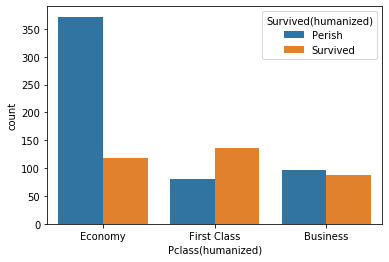

In [18]:
# 시본(seaborn)의 countplot으로 Pclass별 생존자와 사망자의 차이를 시각화합니다.
sns.countplot(data=train, x="Pclass(humanized)", hue="Survived(humanized)")


**4. Embarked 컬럼에 들어가 있는 값을 읽기 쉬운 표현으로 바꿔주세요.**

Embarked 컬럼도 마찬가지로 C, S, Q라는 표현은 직관적이지 않습니다. 저라면 사람이 조금 더 이해하기 쉽게끔 C는 Cherbourg 라는 표현으로, S는 Southampton 이라는 표현으로, 그리고 Q는 Queenstown 이라는 표현으로 바꾸겠습니다.

In [14]:
# pandas의 pivot_table을 활용하여 Embarked 별 생존률을 출력합니다.
# 여기서도 Embarked 컬럼이 C, S, Q라는 다소 직관적이지 않은 값이 나옵니다.
# 그러므로 Embarked 컬럼의 값도 Pclass 처럼 직관적으로 바꿔주고 싶습니다.
pd.pivot_table(data=train, index="Embarked", values="Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Survived(humanized), Pclass(humanized)와 마찬가지로, Embarked 컬럼도 **Embarked(humanized)**라는 이름의 새로운 컬럼을 만들어주세요. 이 컬럼에는 C, S, Q가 아닌 Cherbourg, Southampton, Queenstown이라는 값이 들어갑니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Embarked</th>
         <th>Embarked(humanized)</th>
      </tr>
      <tr>
         <th>PassengerId</th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>1</th>
         <td>S</td>
         <td>Southampton</td>
      </tr>
      <tr>
         <th>2</th>
         <td>C</td>
         <td>Cherbourg</td>
      </tr>
      <tr>
         <th>3</th>
         <td>S</td>
         <td>Southampton</td>
      </tr>
      <tr>
         <th>4</th>
         <td>S</td>
         <td>Southampton</td>
      </tr>
      <tr>
         <th>5</th>
         <td>S</td>
         <td>Southampton</td>
      </tr>
   </tbody>
</table>

또한 위 내용을 바탕으로 **Embarked(humanized)**별 생존자와 사망자의 차이를 시각화해주세요. 최종적으로는 다음의 결과가 나와야 합니다.

![quiz-4](https://drive.google.com/uc?export=view&id=1BlNsp21mz5Xi0gKq0BKd46ZFB2IqIVyq)

In [15]:
# 먼저 Embarked 컬럼이 C인 승객을 색인합니다. 이후 Embarked(humanized)라는 이름의
# 새로운 컬럼을 만들어 여기에 "Cherbourg" 라는 값을 넣습니다.
train.loc[train["Embarked"] == "C", "Embarked(humanized)"] = "Cherbourg"

# 비슷하게 Embarked 컬럼이 2인 승객을 찾아 Embarked(humanized)에 "Southampton" 이라는 값을 넣습니다.
train.loc[train["Embarked"] == "S", "Embarked(humanized)"] = "Southampton"

# 비슷하게 Embarked 컬럼이 3인 승객을 찾아 Embarked(humanized)에 "Queenstown" 이라는 값을 넣습니다.
train.loc[train["Embarked"] == "Q", "Embarked(humanized)"] = "Queenstown"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# Embarked 컬럼과 Embarked(humanized) 컬럼 두 개를 출력하여 비교합니다.
train[["Embarked", "Embarked(humanized)"]].head()

(891, 14)


,Embarked,Embarked(humanized)
PassengerId,,
1,S,Southampton
2,C,Cherbourg
3,S,Southampton
4,S,Southampton
5,S,Southampton


마찬가지로 다음의 방식으로도 구현 가능합니다.

In [16]:
# Survived 컬럼이 0인 값을 Perish로, 1인 값을 Survived로 대체(replace)합니다.
train["Embarked(humanized)"] = train["Embarked"].replace("C", "Cherbourg") \
                                                .replace("S", "Southampton") \
                                                .replace("Q", "Queenstown")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# Embarked 컬럼과 Embarked(humanized) 컬럼 두 개를 출력하여 비교합니다.
train[["Embarked", "Embarked(humanized)"]].head()

(891, 14)


,Embarked,Embarked(humanized)
PassengerId,,
1,S,Southampton
2,C,Cherbourg
3,S,Southampton
4,S,Southampton
5,S,Southampton


그리고 마찬가지로 이번에도 Embarked가 아닌 새롭게 만든 Embarked(humanized) 컬럼으로 pivot_table을 만들어주세요. 여기에는 Cherbourg, Southampton, 그리고 Queenstown 에 탑승한 승객의 생존률이 출력됩니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Survived</th>
      </tr>
      <tr>
         <th>Embarked(humanized)</th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>Cherbourg</th>
         <td>0.553571</td>
      </tr>
      <tr>
         <th>Queenstown</th>
         <td>0.389610</td>
      </tr>
      <tr>
         <th>Southampton</th>
         <td>0.336957</td>
      </tr>
   </tbody>
</table>

In [17]:
# pandas의 pivot_table을 활용하여 Embarked별 생존률을 출력합니다.
# 마찬가지로 Embarked 컬럼이 아닌 Embarked(humanized) 컬럼을 사용합니다.
# 이전에 비해서 훨씬 더 직관적으로 생존률을 확인할 수 있습니다.
pd.pivot_table(data=train, index="Embarked(humanized)", values="Survived")

,Survived
Embarked(humanized),
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


그리고 이를 활용해 seaborn의 countplot으로 시각화 할 수 있습니다.

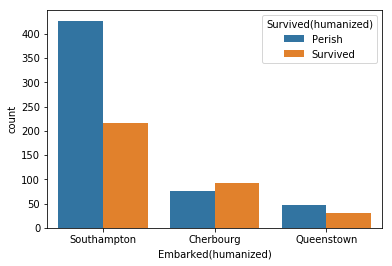

In [18]:
# 시본(seaborn)의 countplot으로 Embarked별 생존자와 사망자의 차이를 시각화합니다.
sns.countplot(data=train, x="Embarked(humanized)", hue="Survived(humanized)")

### 나이(Age) 컬럼 분석

**5. 나이(Age) 컬럼에서 다음의 정보를 출력해주세요.**

  * 평균(mean)
  * 가장 나이가 많은 사람. (max)
  * 가장 나이가 적은 사람. (min)
  
가령 평균은 약 29.7세, 가장 어린 사람은 0.42세(약 생후 4개월), 가장 나이가 많은 사람은 80세가 나와야 합니다.

In [19]:
# 나이(Age) 컬럼에서 mean 함수를 통해 평균 나이를 구합니다.
# 평균 나이가 약 29.7세라는 것을 알 수 있습니다.
train["Age"].mean()

29.69911764705882

In [20]:
# 나이(Age) 컬럼에서 min 함수를 통해 나이의 최소치를 구합니다.
# 타이타닉호에 탑승한 가장 어린 승객은 약 0.42세(생후 4개월 정도)라는 것을 알 수 있습니다.
train["Age"].min()

0.42

In [21]:
# 나이(Age) 컬럼에서 max 함수를 통해 나이의 최대치 구합니다.
# 타이타닉호에 탑승한 가장 나이가 많은 승객은 80세라는 것을 알 수 있습니다.
train["Age"].max()

80.0

또는 판다스의 [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)를 활용하면 한 줄의 코드로 평균, 분산, 최소치, 최대치를 볼 수 있습니다.

In [22]:
# 나이(Age) 컬럼에 대해 describe 함수를 사용합니다.
# 이 함수는 특정 컬럼의 평균, 분산, 최대치, 최소치와 같은 기초적인 통계치를 보여줍니다.
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**6. 객실 등급별 나이(Age) 컬럼의 평균을 보여주세요.**

이번에는 전체 평균이 아닌 객실 등급(Pclass)별 평균을 보고 싶습니다.

가령 전체 승객의 평균 나이는 약 29.7세이지만, 1등급 승객의 평균 나이는 약 38.2세가 나와야 합니다. 비슷한 방식으로 2등급과 3등급 승객의 평균 나이를 알 수 있다면 좋겠습니다.

In [23]:
# Pclass가 1등급인 승객만 색인해서 가져온 뒤, 이를 Pclass1이라는 변수에 할당합니다.
pclass1 = train[train["Pclass"] == 1]

# 1등급 승객의 평균 나이를 구합니다.
pclass1["Age"].mean()

38.233440860215055

In [24]:
# Pclass가 2등급인 승객만 색인해서 가져온 뒤, 이를 Pclass2이라는 변수에 할당합니다.
pclass2 = train[train["Pclass"] == 2]

# 2등급 승객의 평균 나이를 구합니다.
pclass2["Age"].mean()

29.87763005780347

In [25]:
# Pclass가 3등급인 승객만 색인해서 가져온 뒤, 이를 Pclass3이라는 변수에 할당합니다.
pclass3 = train[train["Pclass"] == 3]

# 3등급 승객의 평균 나이를 구합니다.
pclass3["Age"].mean()

25.14061971830986

또는 판다스의 [groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)를 활용하면 한 줄의 코드로 1, 2, 3등급 승객의 평균 나이를 가져올 수 있습니다.

In [26]:
# 타이타닉 데이터를 Pclass 기준으로 그룹화합니다.
# 이렇게 하면 Pclass의 세 종류(1등급, 2등급, 3등급)마다 따로따로 연산을 할 수 있습니다.
# 이후 나이(Age) 컬럼의 평균(mean)을 구하면 1, 2, 3등급마다의 평균 나이가 나옵니다.
train.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

비슷한 기능을 pivot_table로도 할 수 있습니다.

In [27]:
# pandas의 pivot_table을 활용하여 Pclass별 평균 나이(Age)를 출력합니다.
# 이전에 비해서 훨씬 더 깔끔하게 출력할 수 있습니다.
pd.pivot_table(data=train, index="Pclass", values="Age")

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


**7. 나이를 일정 구역으로 나눠서, 구역마다의 생존률을 보여주세요.**

이번에는 나이(Age)별 생존률을 확인하고 싶습니다. 다만 나이 컬럼은 숫자이기 때문에, 그대로 쓰지 않고 일정 구역으로 나눈 뒤 생존률의 통계를 내는 것이 보기 편할 것입니다. 그러므로 나이 컬럼을 다음의 세 구역으로 나눕니다.

  1. 나이가 15세 미만인 승객.
  2. 나이가 15세 이상이고 30세 미만인 승객.
  3. 나이가 30세 이상인 승객.

최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Age</th>
         <th>AgeType</th>
      </tr>
      <tr>
         <th>PassengerId</th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>1</th>
         <td>22.0</td>
         <td>Medium</td>
      </tr>
      <tr>
         <th>2</th>
         <td>38.0</td>
         <td>Old</td>
      </tr>
      <tr>
         <th>3</th>
         <td>26.0</td>
         <td>Medium</td>
      </tr>
      <tr>
         <th>4</th>
         <td>35.0</td>
         <td>Old</td>
      </tr>
      <tr>
         <th>5</th>
         <td>35.0</td>
         <td>Old</td>
      </tr>
      <tr>
         <th>6</th>
         <td>NaN</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>7</th>
         <td>54.0</td>
         <td>Old</td>
      </tr>
      <tr>
         <th>8</th>
         <td>2.0</td>
         <td>Young</td>
      </tr>
      <tr>
         <th>9</th>
         <td>27.0</td>
         <td>Medium</td>
      </tr>
      <tr>
         <th>10</th>
         <td>14.0</td>
         <td>Young</td>
      </tr>
   </tbody>
</table>

또한, 위 조건에서 1번, 2번, 3번 구역에 해당하는 승객의 평균 생존률을 구하고 싶습니다.

가령 1번 구역(나이가 15세 미만)에 해당하는 승객의 평균 생존률은 약 57.7%가 나와야 합니다.

마지막으로 이를 활용해 1) 구역별 생존자와 사망자의 차이, 2) 구역별 평균 나이를 시각화 해주세요. 최종적으로는 다음의 결과가 나와야 합니다.

![quiz-7-1](https://drive.google.com/uc?export=view&id=15otOk_H9yHbARzoSBSbWIzMcswpQ7olE)

![quiz-7-2](https://drive.google.com/uc?export=view&id=1n49DVaxgf2au5eXgnzSV0wY3PoHw02gL)

In [28]:
# 나이가 15세 미만인 승객을 색인한 뒤, AgeType이라는 새로운 컬럼에 "Young"이라는 값을 넣습니다.
train.loc[train["Age"] < 15, "AgeType"] = "Young"

# 비슷하게 나이가 15세 이상 30세 미만인 승객의 AgeType에는 "Medium"이라는 값을 넣습니다.
train.loc[(train["Age"] >= 15) & (train["Age"] < 30), "AgeType"] = "Medium"

# 비슷하겍 30세 이상인 승객의 AgeType에는 "Old"이라는 값을 넣습니다.
train.loc[train["Age"] >= 30, "AgeType"] = "Old"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# 나이(Age) 컬럼과 AgeType 컬럼을 출력하여 비교합니다.
train[["Age", "AgeType"]].head(10)

(891, 15)


,Age,AgeType
PassengerId,,
1,22.0,Medium
2,38.0,Old
3,26.0,Medium
4,35.0,Old
5,35.0,Old
6,NaN,NaN
7,54.0,Old
8,2.0,Young
9,27.0,Medium


In [29]:
# 타이타닉 데이터를 AgeType 기준으로 그룹화합니다.
# 이후 생존 여부(Survived) 컬럼의 평균(mean)을 구하면 Young, Medium, Old 마다의 평균 생존률이 나옵니다.
train.groupby("AgeType")["Survived"].mean()

AgeType
Medium    0.362745
Old       0.406061
Young     0.576923
Name: Survived, dtype: float64

마찬가지로 countplot을 이용해 시각화 할 수 있습니다.

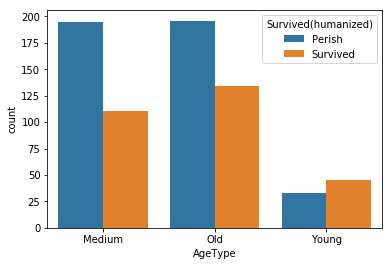

In [30]:
# 시본(seaborn)의 countplot으로 AgeType별 생존자와 사망자의 차이를 시각화합니다.
sns.countplot(data=train, x="AgeType", hue="Survived(humanized)")

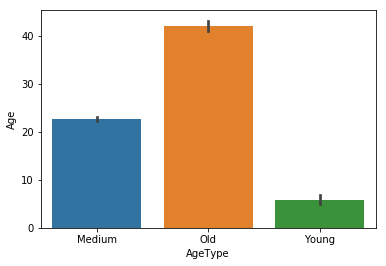

In [49]:
# 시본(seaborn)의 barplot으로 AgeType별 평균 나이(Age)를 시각화합니다.
sns.barplot(data=train, x="AgeType", y="Age")

**8. 나이가 비어있는 승객과 비어있지 않은 승객의 생존률 차이를 보여주세요.**

이번에는 다른 방식으로 생존률의 차이를 보겠습니다. 타이타닉 데이터의 나이(Age) 컬럼을 자세히 보면 나이가 비어있는 데이터가 있습니다. 판다스에서는 이를 NaN(Not a Number의 약자)으로 표현합니다.

타이타닉 데이터에서 나이 컬럼이 비어있는 승객과 비어있지 않은 승객의 생존률을 각각 찾아서 출력해주세요. 또한 이를 시각화로 비교해주세요. 최종적으로 다음의 결과가 나와야합니다.

![quiz-8](https://drive.google.com/uc?export=view&id=18d5DhEuPU4N99avIwrl2FpPGdyQUI7Ty)

In [32]:
# isnull 함수를 활용해 나이 컬럼이 비어있는 승객만 색인합니다.
# 이 데이터에서 AgeBlank라는 새로운 컬럼을 만든 뒤, 여기에 "Blank"라는 값을 넣습니다.
train.loc[train["Age"].isnull(), "AgeBlank"] = "Blank"

# 비슷한 방식으로 notnull 함수를 활용하여 AgeBlank 컬럼에 "Not Blank"라는 값을 넣습니다.
train.loc[train["Age"].notnull(), "AgeBlank"] = "Not Blank"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# 나이(Age) 컬럼과 AgeBlank 컬럼을 출력하여 비교합니다.
train[["Age", "AgeBlank"]].head(10)

(891, 16)


,Age,AgeBlank
PassengerId,,
1,22.0,Not Blank
2,38.0,Not Blank
3,26.0,Not Blank
4,35.0,Not Blank
5,35.0,Not Blank
6,NaN,Blank
7,54.0,Not Blank
8,2.0,Not Blank
9,27.0,Not Blank


In [33]:
# 타이타닉 데이터를 AgeBlank 기준으로 그룹화합니다.
# 이후 생존 여부(Survived) 컬럼의 평균(mean)을 구하면 Blank, Not Blank 마다의 평균 생존률이 나옵니다.
train.groupby("AgeBlank")["Survived"].mean()

AgeBlank
Blank        0.293785
Not Blank    0.406162
Name: Survived, dtype: float64

In [34]:
# 비슷한 기능을 pivot table로도 할 수 있습니다.
pd.pivot_table(data=train, index="AgeBlank", values="Survived")

,Survived
AgeBlank,
Blank,0.293785
Not Blank,0.406162


마찬가지로 이를 countplot으로 시각화할 수 있습니다.

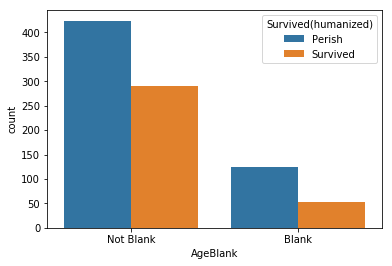

In [52]:
# 시본(seaborn)의 countplot으로 AgeBlank별 생존자와 사망자의 차이를 시각화합니다.
sns.countplot(data=train, x="AgeBlank", hue="Survived(humanized)")

**9. Pclass별 나이(Age)의 평균을 구한 뒤 빈 값에 채워주세요.**

이번에는 나이(Age) 컬럼의 빈 값을 채우고 싶습니다. 일반적으로 가장 많이 하는 방식은 나이의 평균(mean)값을 구한 뒤 이를 빈 값에 채워넣는 것입니다. 하지만 이번에는 다른 방식으로 빈 값을 채우고 싶은데, 바로 객실 등급(Pclass)에 따라 다르게 나이의 빈 값을 채워주고 싶습니다. 가령

  1. 객실 등급(Pclass)이 1등급인 승객의 평균 나이를 구해서, 해당 승객 중 나이(Age)컬럼값이 비어있는 승객을 찾아 빈 나이 값을 채워줍니다.
  2. 객실 등급(Pclass)이 2등급인 승객의 평균 나이를 구해서, 해당 승객 중 나이(Age)컬럼값이 비어있는 승객을 찾아 빈 나이 값을 채워줍니다.
  3. 객실 등급(Pclass)이 3등급인 승객의 평균 나이를 구해서, 해당 승객 중 나이(Age)컬럼값이 비어있는 승객을 찾아 빈 나이 값을 채워줍니다.
  
위와 같은 방식을 사용하면, 단순히 전체 평균을 사용하는 것 보다 조금 더 원래 값에 근접하게 평균을 채워줄 수 있을 것 같습니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Pclass</th>
         <th>Age</th>
         <th>Age(fill)</th>
      </tr>
      <tr>
         <th>PassengerId</th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>1</th>
         <td>3</td>
         <td>22.0</td>
         <td>22.00000</td>
      </tr>
      <tr>
         <th>2</th>
         <td>1</td>
         <td>38.0</td>
         <td>38.00000</td>
      </tr>
      <tr>
         <th>3</th>
         <td>3</td>
         <td>26.0</td>
         <td>26.00000</td>
      </tr>
      <tr>
         <th>4</th>
         <td>1</td>
         <td>35.0</td>
         <td>35.00000</td>
      </tr>
      <tr>
         <th>5</th>
         <td>3</td>
         <td>35.0</td>
         <td>35.00000</td>
      </tr>
      <tr>
         <th>6</th>
         <td>3</td>
         <td>NaN</td>
         <td>25.14062</td>
      </tr>
      <tr>
         <th>7</th>
         <td>1</td>
         <td>54.0</td>
         <td>54.00000</td>
      </tr>
      <tr>
         <th>8</th>
         <td>3</td>
         <td>2.0</td>
         <td>2.00000</td>
      </tr>
      <tr>
         <th>9</th>
         <td>3</td>
         <td>27.0</td>
         <td>27.00000</td>
      </tr>
      <tr>
         <th>10</th>
         <td>2</td>
         <td>14.0</td>
         <td>14.00000</td>
      </tr>
      <tr>
         <th>11</th>
         <td>3</td>
         <td>4.0</td>
         <td>4.00000</td>
      </tr>
      <tr>
         <th>12</th>
         <td>1</td>
         <td>58.0</td>
         <td>58.00000</td>
      </tr>
      <tr>
         <th>13</th>
         <td>3</td>
         <td>20.0</td>
         <td>20.00000</td>
      </tr>
      <tr>
         <th>14</th>
         <td>3</td>
         <td>39.0</td>
         <td>39.00000</td>
      </tr>
      <tr>
         <th>15</th>
         <td>3</td>
         <td>14.0</td>
         <td>14.00000</td>
      </tr>
      <tr>
         <th>16</th>
         <td>2</td>
         <td>55.0</td>
         <td>55.00000</td>
      </tr>
      <tr>
         <th>17</th>
         <td>3</td>
         <td>2.0</td>
         <td>2.00000</td>
      </tr>
      <tr>
         <th>18</th>
         <td>2</td>
         <td>NaN</td>
         <td>29.87763</td>
      </tr>
      <tr>
         <th>19</th>
         <td>3</td>
         <td>31.0</td>
         <td>31.00000</td>
      </tr>
      <tr>
         <th>20</th>
         <td>3</td>
         <td>NaN</td>
         <td>25.14062</td>
      </tr>
   </tbody>
</table>

In [36]:
# 타이타닉 데이터를 Pclass 기준으로 그룹화한 뒤, 나이(Age) 컬럼의 평균을 구합니다.
# 이 결과를 mean_age_by_pclass 라는 변수에 할당합니다.
mean_age_by_pclass = train.groupby("Pclass")["Age"].mean()
mean_age_by_pclass

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [37]:
# Age 컬럼에 바로 값을 채워주는 것도 좋지만, 가능한 원본은 유지한 채 사본에다가 작업하는 것을 추천합니다.
# 그러므로 Age(fill) 이라는 새로운 컬럼을 만든 뒤, 이 컬럼의 빈 값을 채워줄 것입니다.
train["Age(fill)"] = train["Age"]

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# 객실 등급(Pclass), 나이(Age), 그리고 Age(fill) 컬럼을 출력하여 비교합니다.
train[["Pclass","Age", "Age(fill)"]].head(30)

(891, 17)


,Pclass,Age,Age(fill)
PassengerId,,,
1,3,22.0,22.0
2,1,38.0,38.0
3,3,26.0,26.0
4,1,35.0,35.0
5,3,35.0,35.0
6,3,NaN,NaN
7,1,54.0,54.0
8,3,2.0,2.0
9,3,27.0,27.0


In [38]:
# 객실 등급(Pclass)이 1등급이고 나이(Age) 컬럼값이 비어있는 승객을 색인합니다.
# 이 승객의 Age(fill)에 평균 1등급 승객의 평균 나이를 채워넣습니다.
train.loc[(train["Pclass"] == 1) & (train["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass.loc[1]

# 비슷한 원리로 객실 등급(Pclass)이 2등급인 승객도 비슷한 방식으로 빈 나이값을 채워넣습니다.
train.loc[(train["Pclass"] == 2) & (train["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass.loc[2]

# 객실 등급(Pclass)이 3등급인 승객도 비슷한 방식으로 빈 나이값을 채워넣습니다.
train.loc[(train["Pclass"] == 3) & (train["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass.loc[3]

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# 객실 등급(Pclass), 나이(Age), 그리고 Age(fill) 컬럼을 출력하여 비교합니다.
train[["Pclass","Age", "Age(fill)"]].head(30)

(891, 17)


,Pclass,Age,Age(fill)
PassengerId,,,
1,3,22.0,22.00000
2,1,38.0,38.00000
3,3,26.0,26.00000
4,1,35.0,35.00000
5,3,35.0,35.00000
6,3,NaN,25.14062
7,1,54.0,54.00000
8,3,2.0,2.00000
9,3,27.0,27.00000


In [39]:
# 나이(Age) 컬럼값이 비어있는 승객만 가져온 뒤,
# 이 승객의 객실 등급(Pclass), 나이(Age), 그리고 Age(fill) 컬럼을 출력하여 비교합니다.
train.loc[train["Age"].isnull(), ["Pclass","Age", "Age(fill)"]].head(10)

,Pclass,Age,Age(fill)
PassengerId,,,
6,3,NaN,25.140620
18,2,NaN,29.877630
20,3,NaN,25.140620
27,3,NaN,25.140620
29,3,NaN,25.140620
30,3,NaN,25.140620
32,1,NaN,38.233441
33,3,NaN,25.140620
37,3,NaN,25.140620


### SibSp, Parch 컬럼 분석

**10. 타이타닉호에 동승한 형제, 자매, 배우자(SibSp)도 없고, 부모와 자식(Parch)도 없는 사람을 구해주세요.**

해당 사용자를 싱글(Single)이라고 가정하겠습니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>SibSp</th>
         <th>Parch</th>
         <th>Single</th>
      </tr>
      <tr>
         <th>PassengerId</th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>1</th>
         <td>1</td>
         <td>0</td>
         <td>False</td>
      </tr>
      <tr>
         <th>2</th>
         <td>1</td>
         <td>0</td>
         <td>False</td>
      </tr>
      <tr>
         <th>3</th>
         <td>0</td>
         <td>0</td>
         <td>True</td>
      </tr>
      <tr>
         <th>4</th>
         <td>1</td>
         <td>0</td>
         <td>False</td>
      </tr>
      <tr>
         <th>5</th>
         <td>0</td>
         <td>0</td>
         <td>True</td>
      </tr>
   </tbody>
</table>

또한 싱글(Single)인 사람과 그렇지 않은 사람간의 생존률의 차이도 알고 싶습니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Survived</th>
      </tr>
      <tr>
         <th>Single</th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>False</th>
         <td>0.505650</td>
      </tr>
      <tr>
         <th>True</th>
         <td>0.303538</td>
      </tr>
   </tbody>
</table>

마지막으로 이를 시각화를 통해 비교해주세요. 최종적으로는 다음의 결과가 나와야합니다.

![quiz-10](https://drive.google.com/uc?export=view&id=1WakO3v3BHr3aunjcg170AKLjxZ3Xi1eQ)

In [40]:
# SibSp가 0이고 Parch가 0이면 True, 아니면 False인 리스트를 생성합니다.
# 이 리스트를 Single이라는 이름의 새로운 컬럼에 집어넣습니다.
train["Single"] = (train["SibSp"] == 0) & (train["Parch"] == 0)

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# SibSp, Parch, 그리고 Single을 출력하여 비교합니다.
train[["SibSp", "Parch", "Single"]].head()

(891, 18)


,SibSp,Parch,Single
PassengerId,,,
1,1,0,False
2,1,0,False
3,0,0,True
4,1,0,False
5,0,0,True


In [41]:
# pandas의 pivot_table을 활용하여 Single 여부에 따른 생존률을 출력합니다.
# Single 컬럼의 값이 True일 경우의 생존률과, False일 경우의 생존률을 비교할 수 있습니다.
pd.pivot_table(train, index="Single", values="Survived")

,Survived
Single,
False,0.505650
True,0.303538


마찬가지로 countplot으로 시각화할 수 있습니다.

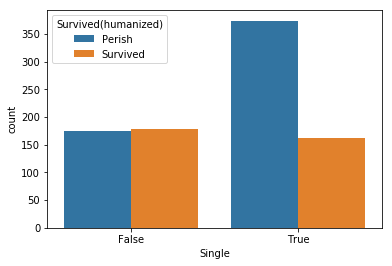

In [51]:
# 시본(seaborn)의 countplot으로 Single별 생존자와 사망자의 차이를 시각화합니다.
sns.countplot(data=train, x="Single", hue="Survived(humanized)")

**11. SibSp 컬럼과  Parch 컬럼을 활용하여 가족 수(FamilySize)라는 새로운 컬럼을 만들어주세요.**

형제, 자매, 배우자(SibSp) 컬럼과 부모 자식(Parch) 컬럼은 얼핏 달라 보이지만 실은 가족 관계를 나타내는 것이라고 볼 수 있습니다. 그러므로 두 컬럼을 하나로 합쳐서 **가족 수(FamilySize)**라는 새로운 컬럼을 만들면 승객의 가족관계를 더 편리하게 분석할 수 있을 것입니다.

형제, 자매, 배우자(SibSp) 컬럼과 부모 자식(Parch) 컬럼을 더해서 가족 수(FamilySize) 컬럼을 만들어주세요. 단 가족 수를 계산할때는 언제나 나 자신을 포함해서 계산하는데, 나 자신은 SibSp 컬럼에도 Parch 컬럼에도 들어가있지 않습니다. 그러므로 가족 수(FamilySize) 컬럼은 언제나 SibSp 컬럼과 Parch 컬럼을 더한 값에서 하나가 더 많아야 합니다.

그러므로 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>SibSp</th>
         <th>Parch</th>
         <th>FamilySize</th>
      </tr>
      <tr>
         <th>PassengerId</th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>1</th>
         <td>1</td>
         <td>0</td>
         <td>2</td>
      </tr>
      <tr>
         <th>2</th>
         <td>1</td>
         <td>0</td>
         <td>2</td>
      </tr>
      <tr>
         <th>3</th>
         <td>0</td>
         <td>0</td>
         <td>1</td>
      </tr>
      <tr>
         <th>4</th>
         <td>1</td>
         <td>0</td>
         <td>2</td>
      </tr>
      <tr>
         <th>5</th>
         <td>0</td>
         <td>0</td>
         <td>1</td>
      </tr>
      <tr>
         <th>6</th>
         <td>0</td>
         <td>0</td>
         <td>1</td>
      </tr>
      <tr>
         <th>7</th>
         <td>0</td>
         <td>0</td>
         <td>1</td>
      </tr>
      <tr>
         <th>8</th>
         <td>3</td>
         <td>1</td>
         <td>5</td>
      </tr>
      <tr>
         <th>9</th>
         <td>0</td>
         <td>2</td>
         <td>3</td>
      </tr>
      <tr>
         <th>10</th>
         <td>1</td>
         <td>0</td>
         <td>2</td>
      </tr>
   </tbody>
</table>

또한 가족 수(FamilySize) 컬럼을 구한 뒤, 가족 수 별 생존률의 차이도 알고 싶습니다. 가족 수(ex: 1명 ~ 11명) 마다의 생존률을 구해서 출력해주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Survived</th>
      </tr>
      <tr>
         <th>FamilySize</th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>1</th>
         <td>0.303538</td>
      </tr>
      <tr>
         <th>2</th>
         <td>0.552795</td>
      </tr>
      <tr>
         <th>3</th>
         <td>0.578431</td>
      </tr>
      <tr>
         <th>4</th>
         <td>0.724138</td>
      </tr>
      <tr>
         <th>5</th>
         <td>0.200000</td>
      </tr>
      <tr>
         <th>6</th>
         <td>0.136364</td>
      </tr>
      <tr>
         <th>7</th>
         <td>0.333333</td>
      </tr>
      <tr>
         <th>8</th>
         <td>0.000000</td>
      </tr>
      <tr>
         <th>11</th>
         <td>0.000000</td>
      </tr>
   </tbody>
</table>

마지막으로 이를 시각화를 통해 보여주세요. 최종적으로는 다음의 결과가 나와야 합니다.



![quiz-11](https://drive.google.com/uc?export=view&id=1vjGvKBVWM1SsSlKz6Aji1ENo6MZV5ses)

In [43]:
# 형제, 자매, 배우자(SibSp) 컬럼과 부모 자식(Parch) 컬럼을 더해서 가족 수(FamilySize) 컬럼을 만듭니다.
# 또한 가족 수에 나 자신을 포함하기 위해서 언제나 +1을 해줍니다.
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# SibSp, Parch, FamilySize를 출력하여 비교합니다.
train[["SibSp", "Parch", "FamilySize"]].head(10)

(891, 19)


,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1
6,0,0,1
7,0,0,1
8,3,1,5
9,0,2,3


In [44]:
# pandas의 pivot_table을 활용하여 FamilySize에 따른 생존률을 출력합니다.
# 가족 수가 1명부터 11명까지 각각의 생존률을 비교할 수 있습니다.
pd.pivot_table(train, index="FamilySize", values="Survived")

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


마찬가지로 이를 countplot으로 시각화할 수 있습니다.

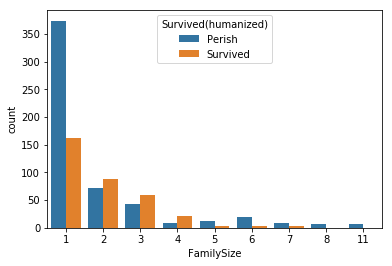

In [50]:
# 시본(seaborn)의 countplot으로 FamilySize별 생존자와 사망자의 차이를 시각화합니다.
sns.countplot(data=train, x="FamilySize", hue="Survived(humanized)")

**12. 가족 수(FamilySize) 컬럼의 구역을 나눠주세요.**

가족 수(FamilySize) 컬럼을 기준으로 pivot_table로 분석을 해본 결과, 경우의 수가 너무 많아서(가족 수가 1명일 때 ~ 11명일 때) 분석 결과가 너무 잘게 쪼개지는 것 같습니다.

그러므로 가족 수(FamilySize) 컬럼을 세 구역으로 나누고 싶습니다. 구체적으로는 다음과 같습니다.

  * **싱글(Single)** - 동승한 가족이 아무도 없고, 나 혼자 탑승한 경우입니다.
  * **핵가족(Nuclear)** - 동승한 가족이 나 자신을 포함해 2명 이상 5명 미만인 경우입니다.
  * **대가족(Big)** - 동승한 가족이 나 자신을 포함 5명 이상인 경우입니다.
  
위의 정보를 활용하여, 가족 형태(FamilyType)라는 새로운 컬럼을 만들어 주세요. 이 컬럼에는 앞서 설명한 Single, Nuclear, 그리고 Big이 들어갑니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>FamilySize</th>
         <th>FamilyType</th>
      </tr>
      <tr>
         <th>PassengerId</th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>1</th>
         <td>2</td>
         <td>Nuclear</td>
      </tr>
      <tr>
         <th>2</th>
         <td>2</td>
         <td>Nuclear</td>
      </tr>
      <tr>
         <th>3</th>
         <td>1</td>
         <td>Single</td>
      </tr>
      <tr>
         <th>4</th>
         <td>2</td>
         <td>Nuclear</td>
      </tr>
      <tr>
         <th>5</th>
         <td>1</td>
         <td>Single</td>
      </tr>
      <tr>
         <th>6</th>
         <td>1</td>
         <td>Single</td>
      </tr>
      <tr>
         <th>7</th>
         <td>1</td>
         <td>Single</td>
      </tr>
      <tr>
         <th>8</th>
         <td>5</td>
         <td>Big</td>
      </tr>
      <tr>
         <th>9</th>
         <td>3</td>
         <td>Nuclear</td>
      </tr>
      <tr>
         <th>10</th>
         <td>2</td>
         <td>Nuclear</td>
      </tr>
   </tbody>
</table>

또한 가족 수(FamilySize)와 마찬가지로 가족 형태(FamilyType) 별 생존률의 차이도 구해주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>FamilySize</th>
         <th>FamilyType</th>
      </tr>
      <tr>
         <th>PassengerId</th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>1</th>
         <td>2</td>
         <td>Nuclear</td>
      </tr>
      <tr>
         <th>2</th>
         <td>2</td>
         <td>Nuclear</td>
      </tr>
      <tr>
         <th>3</th>
         <td>1</td>
         <td>Single</td>
      </tr>
      <tr>
         <th>4</th>
         <td>2</td>
         <td>Nuclear</td>
      </tr>
      <tr>
         <th>5</th>
         <td>1</td>
         <td>Single</td>
      </tr>
      <tr>
         <th>6</th>
         <td>1</td>
         <td>Single</td>
      </tr>
      <tr>
         <th>7</th>
         <td>1</td>
         <td>Single</td>
      </tr>
      <tr>
         <th>8</th>
         <td>5</td>
         <td>Big</td>
      </tr>
      <tr>
         <th>9</th>
         <td>3</td>
         <td>Nuclear</td>
      </tr>
      <tr>
         <th>10</th>
         <td>2</td>
         <td>Nuclear</td>
      </tr>
   </tbody>
</table>

마지막으로 이를 시각화를 통해 비교해주세요. 최종적으로는 다음의 결과가 나와야합니다.

![quiz-12](https://drive.google.com/uc?export=view&id=1xYTDLeZ_6d11DNdzW12RrcCtf4ZEa2nt)

In [46]:
# 가족 수(FamilSize)가 1인 승객을 가져와서, FamilyType 컬럼에 Single 이라는 값을 넣어줍니다.
train.loc[train["FamilySize"] == 1, "FamilyType"] = "Single"

# 가족 수(FamilSize)가 2 이상 5 미만인 승객을 가져와서, FamilyType 컬럼에 Nuclear(핵가족) 이라는 값을 넣어줍니다.
train.loc[(train["FamilySize"] > 1) & (train["FamilySize"] < 5), "FamilyType"] = "Nuclear"

# 가족 수(FamilSize)가 5 이상인 승객을 가져와서, FamilyType 컬럼에 Big(대가족) 이라는 값을 넣어줍니다.
train.loc[train["FamilySize"] >= 5, "FamilyType"] = "Big"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터의 상위 10개를 띄우되, FamilySize와 FamilyType 컬럼만 출력합니다.
train[["FamilySize", "FamilyType"]].head(10)

(891, 20)


,FamilySize,FamilyType
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single
6,1,Single
7,1,Single
8,5,Big
9,3,Nuclear


In [47]:
# pivot_table을 통해 가족 형태(FamilyType)의 변화에 따른 생존률을 출력합니다.
pd.pivot_table(data=train, index="FamilyType", values="Survived")

,Survived
FamilyType,
Big,0.161290
Nuclear,0.578767
Single,0.303538


마지막으로 countplot을 활용해 이를 비교할 수 있습니다.

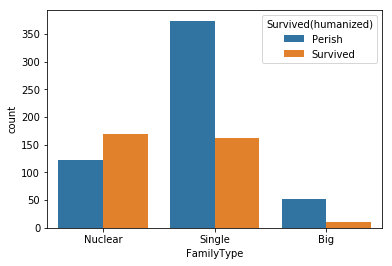

In [48]:
# 시본(seaborn)의 countplot으로 FamilyType별 생존자와 사망자의 차이를 시각화합니다.
sns.countplot(data=train, x="FamilyType", hue="Survived(humanized)")

## 마무리하며

지금까지 프로그래밍 언어 파이썬([Python](https://python.org/))과 파이썬의 데이터 분석 패키지 판다스([Pandas](https://pandas.pydata.org/)), 데이터 시각화 패키지 씨본([Seaborn](https://seaborn.pydata.org))과 [matplotlib](https://matplotlib.org)를 활용한 실전 예제를 살펴보았습니다. 앞서 말씀드린대로, 위 문제를 실전에서 반나절(3~4시간) 안에 해결할 수 있다면 현업에서 데이터 사이언티스트로서 일 할 수 있는 충분한 판다스 스킬을 보유했다고 볼 수 있습니다.

반면 1) 앞으로 데이터 분석을 업무에 활용하고자 하는 분들, 또는 2) 앞으로 데이터 사이언티스트로 취업이나 이직, 전직을 노리는 분 중, 위 문제를 반나절 안에 풀지 못한 분들은 판다스를 추가 학습해야 할 필요가 있다고 생각하시면 됩니다. 그런 분들에게는 다음의 자료를 추천합니다.

  * [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
  * [Pandas Cookbook](http://github.com/jvns/pandas-cookbook)
  * [Python for Data Science](http://wavedatalab.github.io/datawithpython/)
  * [Modern Pandas](http://tomaugspurger.github.io/modern-1-intro.html)
  * [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)
  
또는 위 자료를 참고하지 않고 빠른 기간 안에 판다스와 시각화를 습득하고 싶은 분들에게는 DS School의 [실전 데이터분석 과정](http://dsschool.co.kr/suggestions)을 추천해 드립니다.

기타 수업 관련 문의 사항은 슬랙의 전담 튜터에게 Direct Messages로 연락주세요^^ 수료증, 영수증 발급이나 기수 변경 등은 support@dsschool.co.kr 로 문의 주시면 됩니다!